In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import axes

N = 10000000 #Number of iterations for Monte Carlo simulations

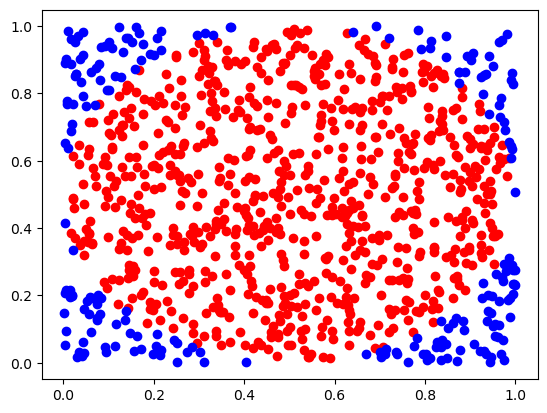

In [2]:
#Plot showing Monte Carlo simulation for estimating \pi from random x,y coordinates generated in an excel file
#x,y coordinates are chosen uniformly randomly in a unit square to estimate proportion of points in the circle

file = pd.read_excel('montecarlo_simulation_pi.ods')
x_1 = file.loc[file['Indicator']==1,'X-coordinate']
y_1 = file.loc[file['Indicator']==1,'Y-coordinate']
x_2 = file.loc[file['Indicator']==0,'X-coordinate']
y_2 = file.loc[file['Indicator']==0,'Y-coordinate']
plt.scatter(x_1,y_1,c="r")
plt.scatter(x_2,y_2,c="b")
plt.show()

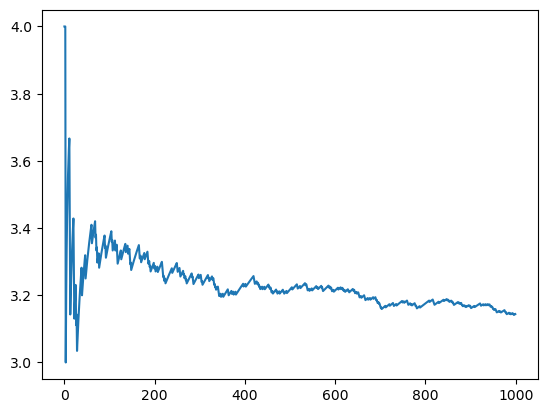

Estimate of \pi after all the iterations is: 3.144


In [3]:
#Plotting the estimates of \pi in the above simulation as a function of the the number of iterations

m = file['Mean']
x = range(len(m))
plt.plot(x,m)
plt.show()
print("Estimate of \pi after all the iterations is:", m.iloc[-1])

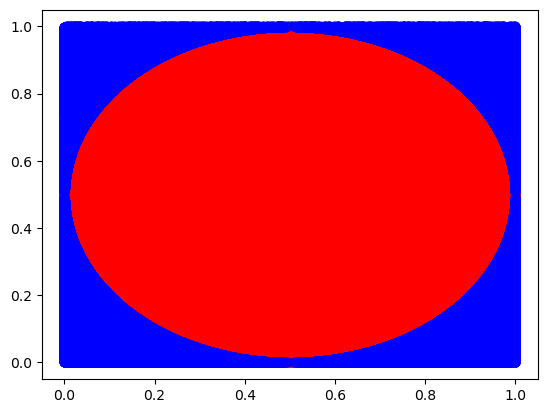

In [4]:
#Plot showing Monte Carlo Simulation for estimating \pi from random x,y coordinates chosen uniformly randomly
#x,y coordinates are chosen in a unit square to estimate proportion of points in the circle

x_all=np.random.uniform(0,1,N)
y_all=np.random.uniform(0,1,N)
x_1=[]
x_2=[]
y_1=[]
y_2=[]
e=[]
r=pow(0.5,2)
for i in range(N):
    if pow(x_all[i]-0.5,2)+pow(y_all[i]-0.5,2)<=r:
        x_1.append(x_all[i])
        y_1.append(y_all[i])
    else:
        x_2.append(x_all[i])
        y_2.append(y_all[i])
    e.append(len(x_1)/(i+1))

plt.scatter(x_1,y_1,c="r")
plt.scatter(x_2,y_2,c="b")
plt.show()

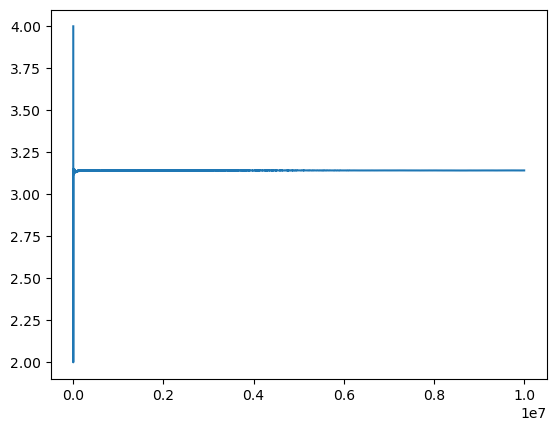

Estimate of \pi after 10000000 iterations is: 3.1421376


In [5]:
#Plotting the estimates of \pi in the above simulation as a function of the the number of iterations

plt.plot(range(N),[i*4 for i in e])
plt.show()
print("Estimate of \pi after",N,"iterations is:", e[-1]*4)

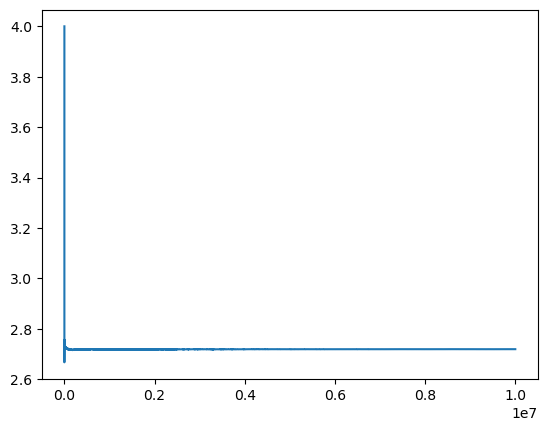

The estimate of Euler's number e after 10000000 iterations is: 2.7187773


In [6]:
#Estimating Euler's number e by Monte Carlo simulation

est=[]
prev_sum=0
for i in range(N):
    s=0
    n=0
    while s<=1:
        s=s+np.random.uniform(0,1)
        n=n+1
    prev_sum=prev_sum+n
    est.append(prev_sum/(i+1))
plt.plot(range(N),est)
plt.show()
print("The estimate of Euler's number e after",N,"iterations is:",est[-1])

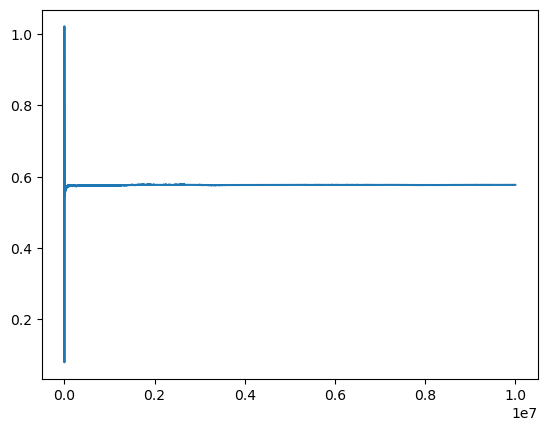

The estimate of Euler's constant \gamma after 10000000 iterations is: 0.5771113864777324


In [7]:
#Estimating Euler's constant \gamma by Monte Carlo simulation as the expected value of Gumbel distribution

prev_sum=0
est=[]
for i in range(N):
    v=-np.log(-np.log(np.random.uniform(0,1)))
    prev_sum=prev_sum+v
    est.append(prev_sum/(i+1))
plt.plot(range(N),est)
plt.show()
print("The estimate of Euler's constant \gamma after",N,"iterations is:",est[-1])

In [ ]:
#Estimating Golden Ratio \phi by Monte Carlo simulation using the fact that (a+b)/a must be close to a/b

In [ ]:
#Estimation Silver Ratio \delta by Monte Carlo simulation using the fact that (2a+b)/a must be close to a/b